In [60]:
import requests
from bs4 import BeautifulSoup as BS  
import pandas as pd
from IPython.core.display import HTML, display
from urllib.request import Request, urlopen
import matplotlib.pyplot as plt

In [61]:
website_url = 'https://www.runrocknroll.com/nashville'
response = requests.post(website_url)

response.status_code

200

In [3]:
print(type(response))
response.content

<class 'requests.models.Response'>


b'\n<!DOCTYPE html>\n<!--[if IE 9]><html lang="en" class="ie9 no-js"><![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<script src="/cdn-cgi/apps/head/u7S6kWy3Cysuih2qEtS0XdJlwiE.js"></script><link href="/styles/vendor.min.css" rel="stylesheet" />\n<link href="/styles/rnr.min.css" rel="stylesheet" />\n<style type="text/css">\r\n#awwm-div{\r\n float: right; width: 360px; margin-top: 7px;\r\n}\r\n\r\n#awwm-div img{\r\nfloat: left; margin-right: 10px;\r\n}\r\n\r\n@media screen and (max-width: 1044px){\r\n#awwm-div{\r\nmargin-top: 10px;\r\nfont-size: 12px;\r\n float: none;\r\n}\r\n\r\n}\r\n</style>\n<meta charset="utf-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta http-equiv="Content-type" content="text/html; charset=utf-8">\n<meta content="width=device-width, initial-scale=1.0" name="viewport" />\n<title>Rock &#39;n&#39; Roll Nashville | Rock n Roll Marathon Series | Marathon Half Marathon Events</title>\n<meta name="description" content="R

In [4]:
rock_roll_marathons = BS(response.content, 'lxml')
print(rock_roll_marathons.title)

<title>Rock 'n' Roll Nashville | Rock n Roll Marathon Series | Marathon Half Marathon Events</title>


In [5]:
print(rock_roll_marathons)

<!DOCTYPE html>
<!--[if IE 9]><html lang="en" class="ie9 no-js"><![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<script src="/cdn-cgi/apps/head/u7S6kWy3Cysuih2qEtS0XdJlwiE.js"></script><link href="/styles/vendor.min.css" rel="stylesheet"/>
<link href="/styles/rnr.min.css" rel="stylesheet"/>
<style type="text/css">
#awwm-div{
 float: right; width: 360px; margin-top: 7px;
}

#awwm-div img{
float: left; margin-right: 10px;
}

@media screen and (max-width: 1044px){
#awwm-div{
margin-top: 10px;
font-size: 12px;
 float: none;
}

}
</style>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title>Rock 'n' Roll Nashville | Rock n Roll Marathon Series | Marathon Half Marathon Events</title>
<meta content="Run Rock 'n' Roll Nashville Marathon, Half Marathon, 5k, and KiDS ROCK | The Rock 'n' Roll Nashville 

In [6]:
pages_2016 = 154
pages_2017 = 147
pages_2018 = 85
pages_2019 = 113
pgs_half_2016 = 898
pgs_half_2017 = 892
pgs_half_2018 = 598
pgs_half_2019 = 690

In [7]:
urlbase_2019 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2019-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='

In [8]:
urlbase_2018 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2018-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='

In [9]:
urlbase_2017 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2017-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='

In [10]:
urlbase_2016 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2016-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='

In [11]:
urlbase_half_2019 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2019-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='

In [12]:
urlbase_half_2018 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2018-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='

In [13]:
urlbase_half_2017 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2017-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='

In [14]:
urlbase_half_2016 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2016-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='

In [15]:
marathon2016_df = pd.DataFrame(columns = ['Overall', 'Bib', 'Name', 'Time'])
marathon2017_df = pd.DataFrame(columns = ['Overall', 'Bib', 'Name', 'Time'])
marathon2018_df = pd.DataFrame(columns = ['Overall', 'Bib', 'Name', 'Time'])
marathon2019_df = pd.DataFrame(columns = ['Overall', 'Bib', 'Name', 'Time'])

In [16]:
half2016_df = pd.DataFrame(columns = ['Overall', 'Bib', 'Name', 'Time'])
half2017_df = pd.DataFrame(columns = ['Overall', 'Bib', 'Name', 'Time'])
half2018_df = pd.DataFrame(columns = ['Overall', 'Bib', 'Name', 'Time'])
half2019_df = pd.DataFrame(columns = ['Overall', 'Bib', 'Name', 'Time'])

In [17]:
def marathon_scraper(urlbase, pag_value, df):
    for i in range (1, pag_value):
        url = urlbase + str(i)
        result = requests.post(url)
        soup = BS(result.text, 'lxml')
        tables = soup.find_all('table', attrs = {'class': 'table table-responsive table-bordered'})
        results_list = pd.read_html(str(tables[0]))
        pre_df = pd.DataFrame(results_list[0])
        df = pd.concat([df, pre_df], axis=0)
    return df

In [18]:
marathon2019_df = marathon_scraper(urlbase_2019, pages_2019, marathon2019_df)

In [19]:
marathon2019_df.head()

,Overall,Bib,Name,Time
0,1,30001,Travis Peruski,01:37:54
1,2,1,Scott Wietecha,02:34:59
2,3,4,Jordan Wilson,02:35:24
3,4,30034,Steelton Flynn,02:39:59
4,5,30035,Thomas Ellis,02:42:09


In [20]:
marathon2019_df.dtypes

Overall    object
Bib        object
Name       object
Time       object
dtype: object

In [21]:
marathon2019_df.shape

(2800, 4)

In [22]:
marathon2018_df = marathon_scraper(urlbase_2018, pages_2018, marathon2018_df)

In [23]:
marathon2018_df.head()

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,02:28:16
1,2,3,Garang Madut,02:29:52
2,3,33442,Kevin Fink,02:38:59
3,4,33441,Andrew Hodges,02:43:59
4,5,30028,Nicholas Aubert,02:48:11


In [24]:
marathon2017_df = marathon_scraper(urlbase_2017, pages_2017, marathon2017_df)

In [25]:
marathon2017_df.head()

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,02:40:25
1,2,1145,Ryan Regnier,02:56:28
2,3,1147,Daniel Everett,03:00:55
3,4,1029,Khris Vickroy,03:04:47
4,5,1119,Marcus Dilallo,03:04:53


In [26]:
marathon2016_df = marathon_scraper(urlbase_2016, pages_2016, marathon2016_df)

In [27]:
marathon2016_df.head()

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,02:25:42
1,2,3,Brian Shelton,02:34:43
2,3,1047,Christopher Capps,02:38:43
3,4,1052,Jason Grimes,02:45:06
4,5,1046,David Adams,02:47:28


In [28]:
half2019_df = marathon_scraper(urlbase_half_2019, pgs_half_2019, half2019_df)

In [29]:
half2019_df.head()

,Overall,Bib,Name,Time
0,1,31,Nick French,01:10:03
1,2,33,Ian Bordelon,01:12:15
2,3,32,Chris Demetra,01:12:52
3,4,1025,Grayson Reid,01:15:10
4,5,34,Jason Vincze,01:17:01


In [30]:
half2018_df = marathon_scraper(urlbase_half_2018, pgs_half_2018, half2018_df)

In [31]:
half2018_df.head()

,Overall,Bib,Name,Time
0,1,103,Roosevelt Cook,01:09:25
1,2,107,Lucas Cotter,01:09:51
2,3,105,Nick French,01:10:38
3,4,106,Jason Vincze,01:11:50
4,5,104,Joseph Elsakr,01:13:28


In [32]:
half2017_df = marathon_scraper(urlbase_half_2017, pgs_half_2017, half2017_df)

In [33]:
half2017_df.head()

,Overall,Bib,Name,Time
0,1,202,Tyler Andrews,01:10:58
1,2,204,Bill Martin,01:11:25
2,3,206,Nick French,01:11:42
3,4,201,Roosevelt Cook,01:13:20
4,5,1655,Erick Kigen,01:14:56


In [34]:
half2016_df = marathon_scraper(urlbase_half_2016, pgs_half_2016, half2016_df)

In [35]:
half2016_df.head()

,Overall,Bib,Name,Time
0,1,201,Roosevelt Cook,01:11:15
1,2,204,Bill Martin,01:11:50
2,3,1623,Cody Hodgins,01:13:43
3,4,1222,Andrew Archer,01:15:04
4,5,1224,Brian Syring,01:15:30


In [49]:
marathon2016_df['Year'] = 2016
marathon2016_df.head()

,Overall,Bib,Name,Time,Year
0,1,1,Scott Wietecha,02:25:42,2016
1,2,3,Brian Shelton,02:34:43,2016
2,3,1047,Christopher Capps,02:38:43,2016
3,4,1052,Jason Grimes,02:45:06,2016
4,5,1046,David Adams,02:47:28,2016


In [50]:
marathon2017_df['Year'] = 2017
marathon2017_df.head()

,Overall,Bib,Name,Time,Year
0,1,1,Scott Wietecha,02:40:25,2017
1,2,1145,Ryan Regnier,02:56:28,2017
2,3,1147,Daniel Everett,03:00:55,2017
3,4,1029,Khris Vickroy,03:04:47,2017
4,5,1119,Marcus Dilallo,03:04:53,2017


In [51]:
marathon2018_df['Year'] = 2018
marathon2018_df.head()

,Overall,Bib,Name,Time,Year
0,1,1,Scott Wietecha,02:28:16,2018
1,2,3,Garang Madut,02:29:52,2018
2,3,33442,Kevin Fink,02:38:59,2018
3,4,33441,Andrew Hodges,02:43:59,2018
4,5,30028,Nicholas Aubert,02:48:11,2018


In [52]:
marathon2019_df['Year'] = 2019
marathon2019_df.head()

,Overall,Bib,Name,Time,Year
0,1,30001,Travis Peruski,01:37:54,2019
1,2,1,Scott Wietecha,02:34:59,2019
2,3,4,Jordan Wilson,02:35:24,2019
3,4,30034,Steelton Flynn,02:39:59,2019
4,5,30035,Thomas Ellis,02:42:09,2019


In [53]:
half2016_df['Year'] = 2016
half2016_df.head()

,Overall,Bib,Name,Time,Year
0,1,201,Roosevelt Cook,01:11:15,2016
1,2,204,Bill Martin,01:11:50,2016
2,3,1623,Cody Hodgins,01:13:43,2016
3,4,1222,Andrew Archer,01:15:04,2016
4,5,1224,Brian Syring,01:15:30,2016


In [54]:
half2017_df['Year'] = 2017
half2017_df.head()

,Overall,Bib,Name,Time,Year
0,1,202,Tyler Andrews,01:10:58,2017
1,2,204,Bill Martin,01:11:25,2017
2,3,206,Nick French,01:11:42,2017
3,4,201,Roosevelt Cook,01:13:20,2017
4,5,1655,Erick Kigen,01:14:56,2017


In [55]:
half2018_df['Year'] = 2018
half2018_df.head()

,Overall,Bib,Name,Time,Year
0,1,103,Roosevelt Cook,01:09:25,2018
1,2,107,Lucas Cotter,01:09:51,2018
2,3,105,Nick French,01:10:38,2018
3,4,106,Jason Vincze,01:11:50,2018
4,5,104,Joseph Elsakr,01:13:28,2018


In [56]:
half2019_df['Year'] = 2019
half2019_df.head()

,Overall,Bib,Name,Time,Year
0,1,31,Nick French,01:10:03,2019
1,2,33,Ian Bordelon,01:12:15,2019
2,3,32,Chris Demetra,01:12:52,2019
3,4,1025,Grayson Reid,01:15:10,2019
4,5,34,Jason Vincze,01:17:01,2019


In [57]:
all_full_marathons = pd.concat([marathon2016_df, marathon2017_df, marathon2018_df, marathon2019_df])
all_full_marathons.head()

,Overall,Bib,Name,Time,Year
0,1,1,Scott Wietecha,02:25:42,2016
1,2,3,Brian Shelton,02:34:43,2016
2,3,1047,Christopher Capps,02:38:43,2016
3,4,1052,Jason Grimes,02:45:06,2016
4,5,1046,David Adams,02:47:28,2016


In [58]:
all_half_marathons = pd.concat([half2016_df, half2017_df, half2018_df, half2019_df])
all_half_marathons.head()

,Overall,Bib,Name,Time,Year
0,1,201,Roosevelt Cook,01:11:15,2016
1,2,204,Bill Martin,01:11:50,2016
2,3,1623,Cody Hodgins,01:13:43,2016
3,4,1222,Andrew Archer,01:15:04,2016
4,5,1224,Brian Syring,01:15:30,2016


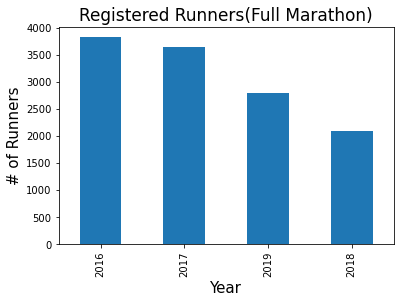

In [64]:
all_full_marathons.Year.value_counts().plot(kind='bar')
plt.xlabel('Year', size=15)
plt.ylabel('# of Runners', size=15)
plt.title('Registered Runners(Full Marathon)', size=17)
plt.savefig('Full Marathons')

In [65]:
all_half_marathons.to_csv(r'C:\Users\14075\Documents\nss\projects\web-scraping-marathon-data-nismo2020\all_half_marathons.csv', index = False)

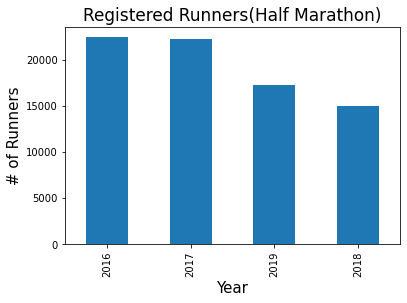

In [66]:
all_half_marathons.Year.value_counts().plot(kind='bar')
plt.xlabel('Year', size=15)
plt.ylabel('# of Runners', size=15)
plt.title('Registered Runners(Half Marathon)', size=17)
plt.savefig('Half Marathons')

In [67]:
marathon2019_df.to_csv(r'C:\Users\14075\Documents\nss\projects\web-scraping-marathon-data-nismo2020\marathon2019_df.csv', index = False)

In [68]:
marathon2018_df.to_csv(r'C:\Users\14075\Documents\nss\projects\web-scraping-marathon-data-nismo2020\marathon2018_df.csv', index = False)

In [69]:
marathon2017_df.to_csv(r'C:\Users\14075\Documents\nss\projects\web-scraping-marathon-data-nismo2020\marathon2017_df.csv', index = False)

In [70]:
marathon2016_df.to_csv(r'C:\Users\14075\Documents\nss\projects\web-scraping-marathon-data-nismo2020\marathon2016_df.csv', index = False)

In [71]:
all_full_marathons.to_csv(r'C:\Users\14075\Documents\nss\projects\web-scraping-marathon-data-nismo2020\all_full_marathons.csv', index = False)

In [72]:
half2019_df.to_csv(r'C:\Users\14075\Documents\nss\projects\web-scraping-marathon-data-nismo2020\half2019_df.csv', index = False)

In [73]:
half2018_df.to_csv(r'C:\Users\14075\Documents\nss\projects\web-scraping-marathon-data-nismo2020\half2018_df.csv', index = False)

In [74]:
half2017_df.to_csv(r'C:\Users\14075\Documents\nss\projects\web-scraping-marathon-data-nismo2020\half2017_df.csv', index = False)

In [75]:
half2016_df.to_csv(r'C:\Users\14075\Documents\nss\projects\web-scraping-marathon-data-nismo2020\half2016_df.csv', index = False)